In [1]:
import pandas as pd

# Load the dataset
dataset_path = "/kaggle/input/college-placement/placement-dataset.csv"
placement_data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
placement_data.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


**What are the Basic Statistics of the Numerical Columns in the Dataset?**

In [2]:
# Display basic statistics of numerical columns
numerical_stats = placement_data.describe()
print(numerical_stats)


       Unnamed: 0        cgpa          iq   placement
count  100.000000  100.000000  100.000000  100.000000
mean    49.500000    5.991000  123.580000    0.500000
std     29.011492    1.143634   39.944198    0.502519
min      0.000000    3.300000   37.000000    0.000000
25%     24.750000    5.075000  101.500000    0.000000
50%     49.500000    6.000000  127.500000    0.500000
75%     74.250000    6.900000  149.000000    1.000000
max     99.000000    8.500000  233.000000    1.000000


**Are There Any Missing Values in the Dataset? If So, How Should They be Handled?**

In [3]:
# Check for missing values
missing_values = placement_data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:\n", missing_values)

# Handle missing values (if any)
# Example: Fill missing values with mean for numerical columns
placement_data.fillna(placement_data.mean(), inplace=True)


Missing Values:
 Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64


**What is the Distribution of CGPA and IQ Scores in the Dataset?**

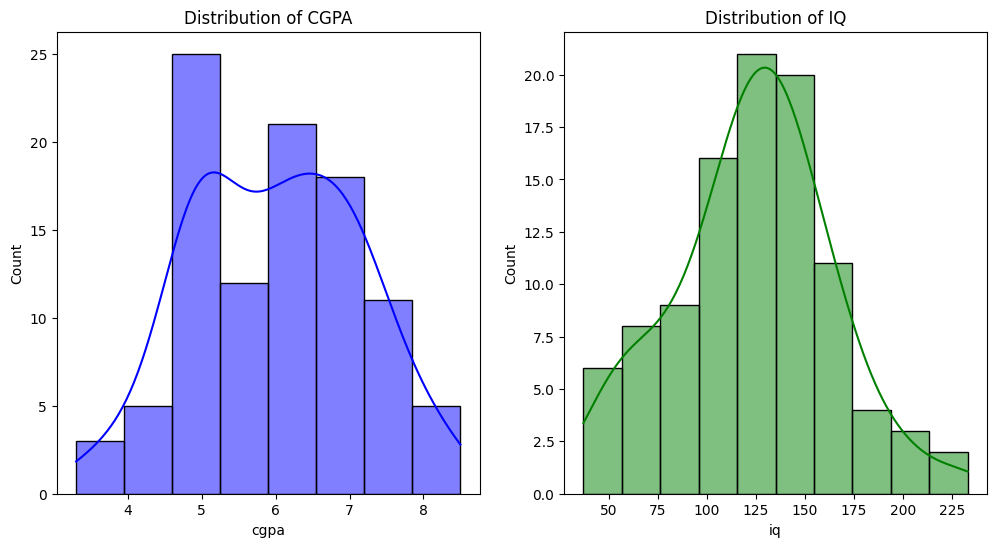

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot distribution of CGPA
plt.subplot(1, 2, 1)
sns.histplot(placement_data['cgpa'], kde=True, color='blue')
plt.title('Distribution of CGPA')

# Plot distribution of IQ
plt.subplot(1, 2, 2)
sns.histplot(placement_data['iq'], kde=True, color='green')
plt.title('Distribution of IQ')

# Show the plots
plt.show()


**What Proportion of Students Have Secured Placement?**

In [5]:
# Calculate the proportion of students with placement
placement_proportion = placement_data['placement'].value_counts(normalize=True) * 100

# Display the proportion
print("Placement Proportion:\n", placement_proportion)


Placement Proportion:
 placement
1    50.0
0    50.0
Name: proportion, dtype: float64


**Is There a Correlation Between CGPA, IQ, and Placement Status?**

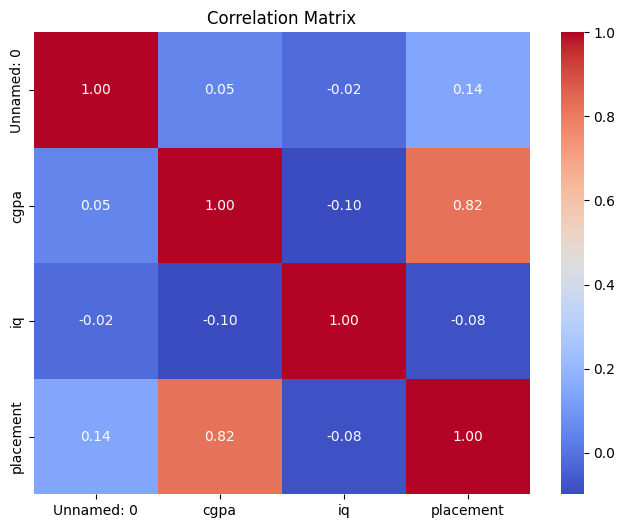

In [6]:
# Calculate correlation matrix
correlation_matrix = placement_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**What is the Distribution of CGPA and IQ Scores Based on Placement Status?**

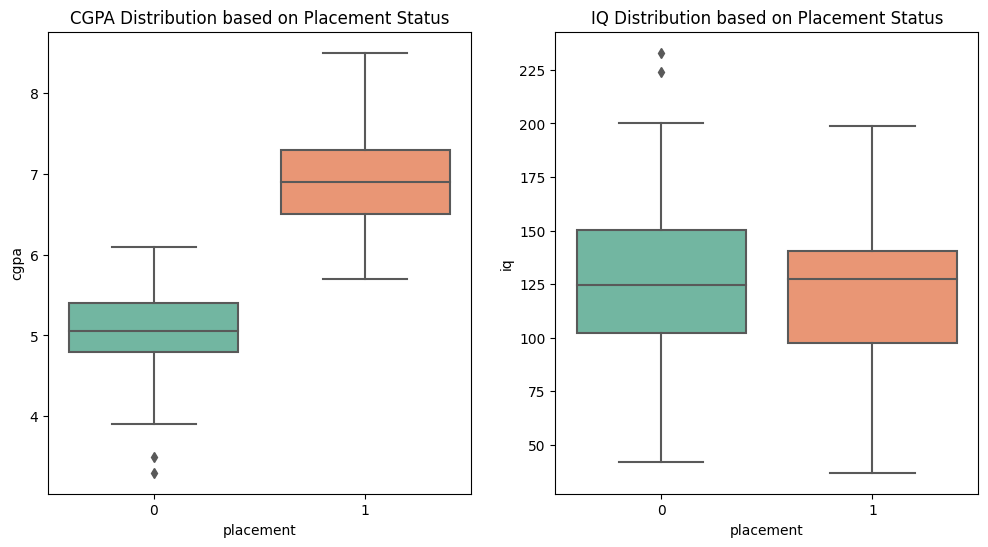

In [7]:
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot distribution of CGPA based on placement status
plt.subplot(1, 2, 1)
sns.boxplot(x='placement', y='cgpa', data=placement_data, palette='Set2')
plt.title('CGPA Distribution based on Placement Status')

# Plot distribution of IQ based on placement status
plt.subplot(1, 2, 2)
sns.boxplot(x='placement', y='iq', data=placement_data, palette='Set2')
plt.title('IQ Distribution based on Placement Status')

# Show the plots
plt.show()


**What is the Proportion of Students with Placement, Stratified by CGPA Levels?**

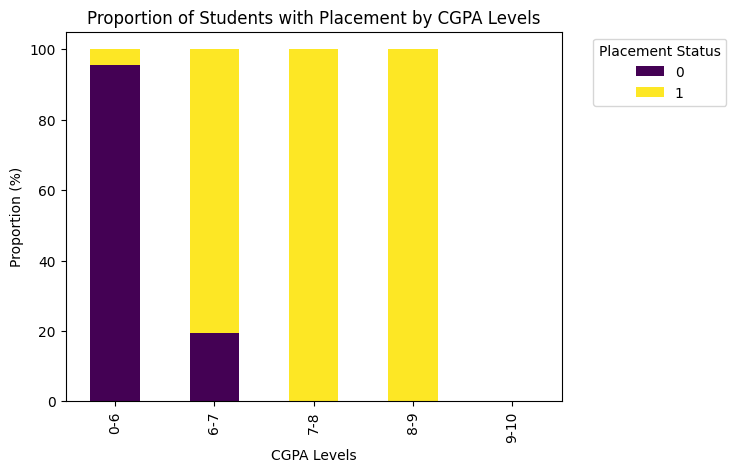

In [8]:
# Create CGPA bins
cgpa_bins = [0, 6, 7, 8, 9, 10]
cgpa_labels = ['0-6', '6-7', '7-8', '8-9', '9-10']

# Create a new column for CGPA bins
placement_data['cgpa_bins'] = pd.cut(placement_data['cgpa'], bins=cgpa_bins, labels=cgpa_labels, right=False)

# Calculate the proportion of students with placement for each CGPA bin
placement_by_cgpa = placement_data.groupby('cgpa_bins')['placement'].value_counts(normalize=True).unstack() * 100

# Plot the stacked bar chart
placement_by_cgpa.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Students with Placement by CGPA Levels')
plt.xlabel('CGPA Levels')
plt.ylabel('Proportion (%)')
plt.legend(title='Placement Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Is There a Difference in Mean CGPA and IQ Between Students with and Without Placement?**

In [9]:
# Calculate mean CGPA and IQ for students with and without placement
mean_values_by_placement = placement_data.groupby('placement').agg({'cgpa': 'mean', 'iq': 'mean'})

# Display the mean values
print("Mean CGPA and IQ by Placement Status:\n", mean_values_by_placement)


Mean CGPA and IQ by Placement Status:
             cgpa      iq
placement               
0          5.056  126.88
1          6.926  120.28


**How Does Placement Status Vary with CGPA and IQ?**

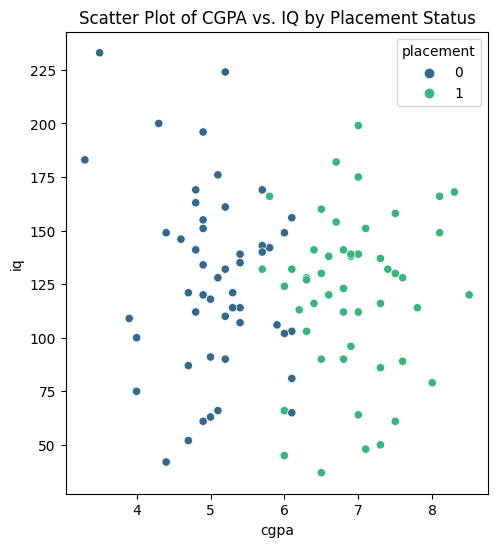

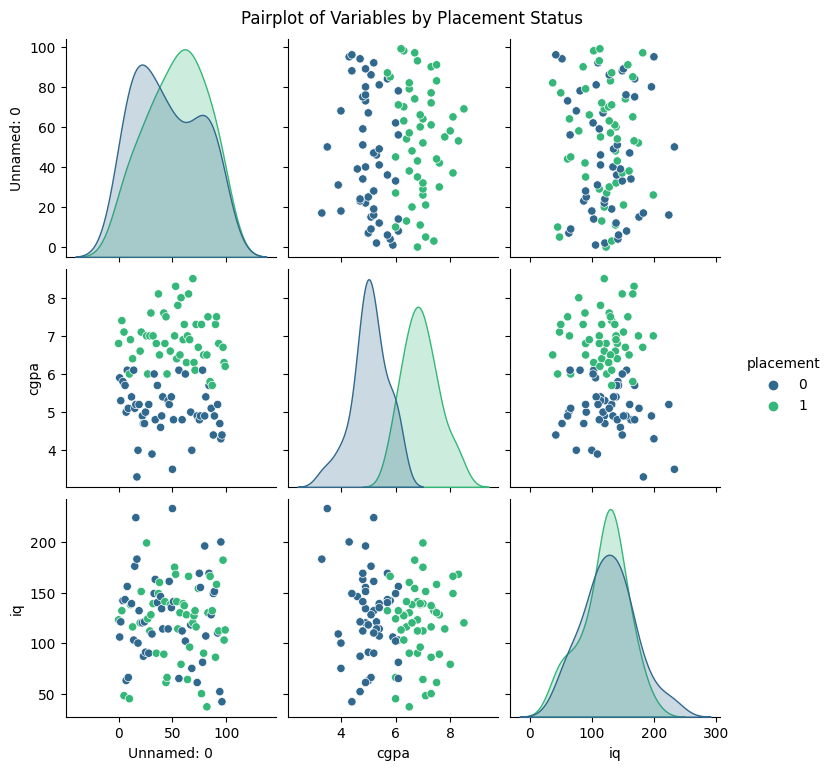

In [10]:
# Set up the figure with subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
# Plot scatter plot for CGPA vs. IQ colored by placement status
sns.scatterplot(x='cgpa', y='iq', hue='placement', data=placement_data, palette='viridis')
plt.title('Scatter Plot of CGPA vs. IQ by Placement Status')
# Plot pairplot to explore relationships between variables
plt.subplot(1, 2, 2)
sns.pairplot(placement_data, hue='placement', palette='viridis')
plt.suptitle('Pairplot of Variables by Placement Status', y=1.02)
plt.show()


**What is the Relationship Between CGPA and IQ for Students with Placement?**

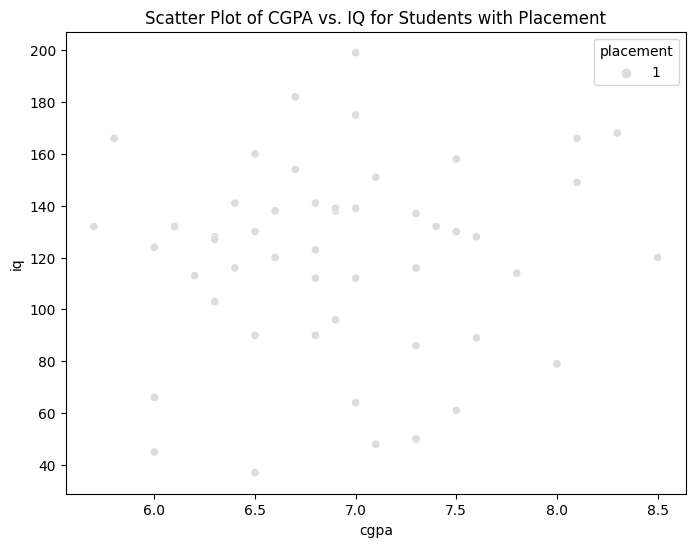

In [11]:
# Scatter plot for CGPA vs. IQ for students with placement
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cgpa', y='iq', hue='placement', data=placement_data[placement_data['placement'] == 1], palette='coolwarm')
plt.title('Scatter Plot of CGPA vs. IQ for Students with Placement')
plt.show()


**How does the CGPA Distribution Differ for Students with and Without Placement?**

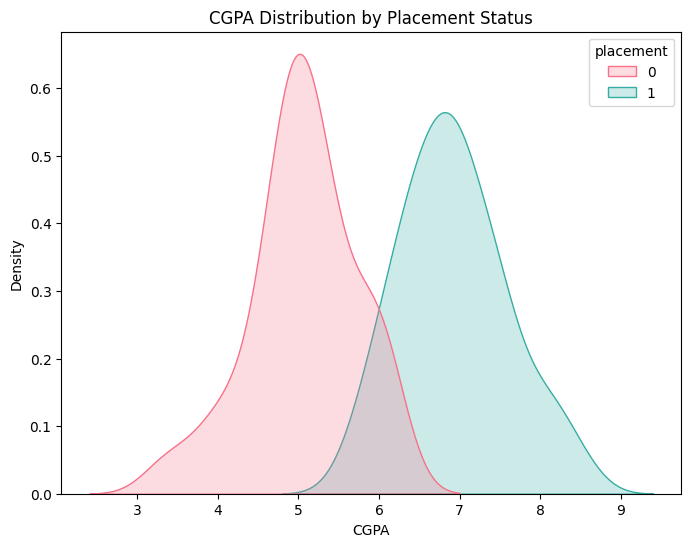

In [12]:
# KDE plot for CGPA distribution based on placement status
plt.figure(figsize=(8, 6))
sns.kdeplot(x='cgpa', hue='placement', data=placement_data, fill=True, common_norm=False, palette='husl')
plt.title('CGPA Distribution by Placement Status')
plt.xlabel('CGPA')
plt.show()


**How Does the Placement Rate Vary Across Different IQ Levels?**

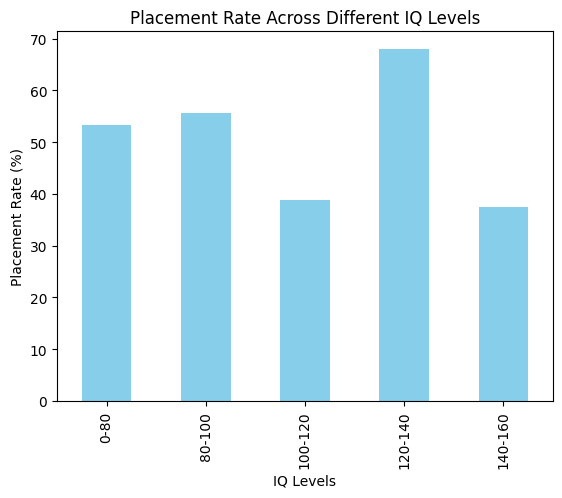

In [13]:
# Create IQ bins
iq_bins = [0, 80, 100, 120, 140, 160]
iq_labels = ['0-80', '80-100', '100-120', '120-140', '140-160']

# Create a new column for IQ bins
placement_data['iq_bins'] = pd.cut(placement_data['iq'], bins=iq_bins, labels=iq_labels, right=False)

# Calculate the placement rate for each IQ bin
placement_rate_by_iq = placement_data.groupby('iq_bins')['placement'].mean() * 100

# Plot the bar chart
placement_rate_by_iq.plot(kind='bar', color='skyblue')
plt.title('Placement Rate Across Different IQ Levels')
plt.xlabel('IQ Levels')
plt.ylabel('Placement Rate (%)')
plt.show()


**What is the Distribution of CGPA for Students Who Secured Placement?**

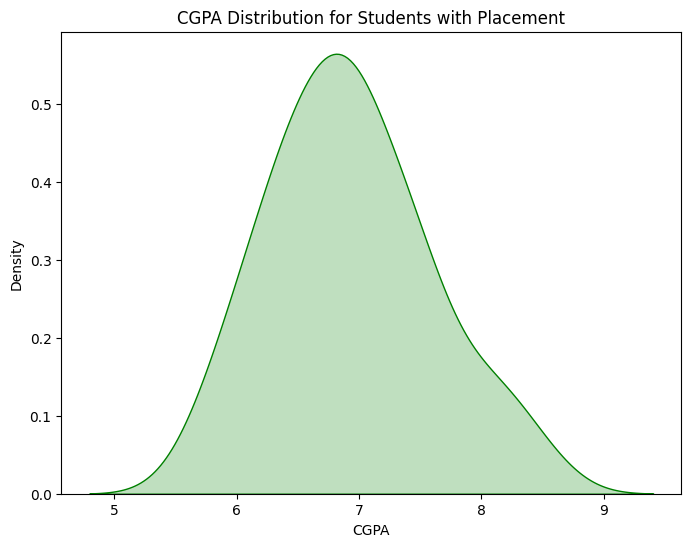

In [14]:
# KDE plot for CGPA distribution of students with placement
plt.figure(figsize=(8, 6))
sns.kdeplot(x='cgpa', data=placement_data[placement_data['placement'] == 1], fill=True, common_norm=False, color='green')
plt.title('CGPA Distribution for Students with Placement')
plt.xlabel('CGPA')
plt.show()


**What is the Distribution of IQ for Students Who Secured Placement?**

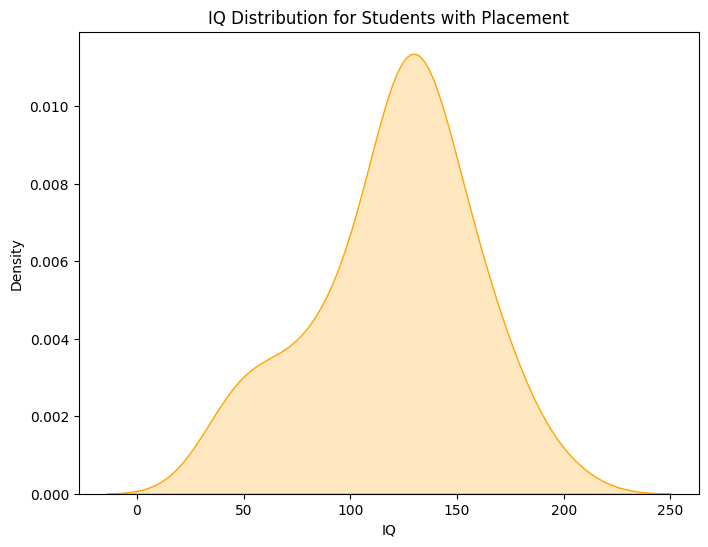

In [15]:
# KDE plot for IQ distribution of students with placement
plt.figure(figsize=(8, 6))
sns.kdeplot(x='iq', data=placement_data[placement_data['placement'] == 1], fill=True, common_norm=False, color='orange')
plt.title('IQ Distribution for Students with Placement')
plt.xlabel('IQ')
plt.show()


**How Does CGPA Vary Across Different IQ Levels?**

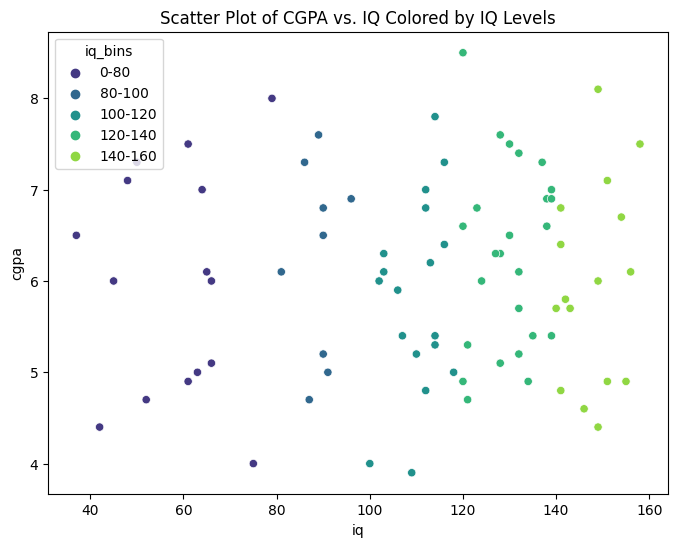

In [16]:
# Scatter plot for CGPA vs. IQ colored by IQ levels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='iq', y='cgpa', hue='iq_bins', data=placement_data, palette='viridis')
plt.title('Scatter Plot of CGPA vs. IQ Colored by IQ Levels')
plt.show()


**What is the Distribution of CGPA for Students Without Placement?**

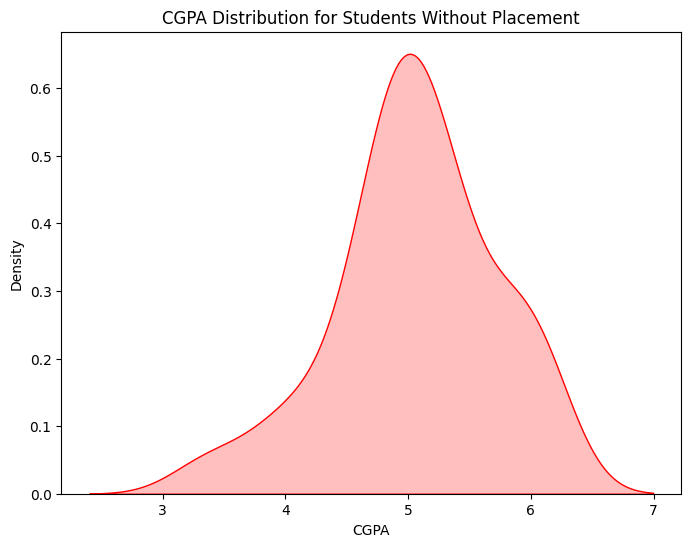

In [17]:
# KDE plot for CGPA distribution of students without placement
plt.figure(figsize=(8, 6))
sns.kdeplot(x='cgpa', data=placement_data[placement_data['placement'] == 0], fill=True, common_norm=False, color='red')
plt.title('CGPA Distribution for Students Without Placement')
plt.xlabel('CGPA')
plt.show()


**What is the Percentage of Students with Placement for Different CGPA Ranges?**

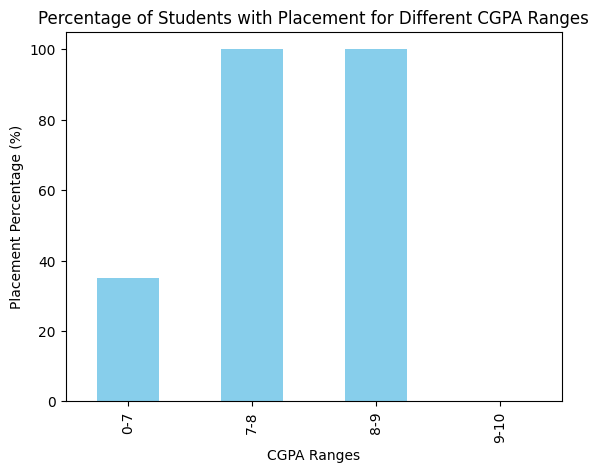

In [18]:
# Create CGPA bins for analysis
cgpa_bins_analysis = [0, 7, 8, 9, 10]
cgpa_labels_analysis = ['0-7', '7-8', '8-9', '9-10']

# Create a new column for CGPA bins for analysis
placement_data['cgpa_bins_analysis'] = pd.cut(placement_data['cgpa'], bins=cgpa_bins_analysis, labels=cgpa_labels_analysis, right=False)

# Calculate the percentage of students with placement for each CGPA range
placement_percentage_by_cgpa_range = placement_data.groupby('cgpa_bins_analysis')['placement'].mean() * 100

# Plot the bar chart
placement_percentage_by_cgpa_range.plot(kind='bar', color='skyblue')
plt.title('Percentage of Students with Placement for Different CGPA Ranges')
plt.xlabel('CGPA Ranges')
plt.ylabel('Placement Percentage (%)')
plt.show()


**How Does IQ Vary Across Different CGPA Ranges?**

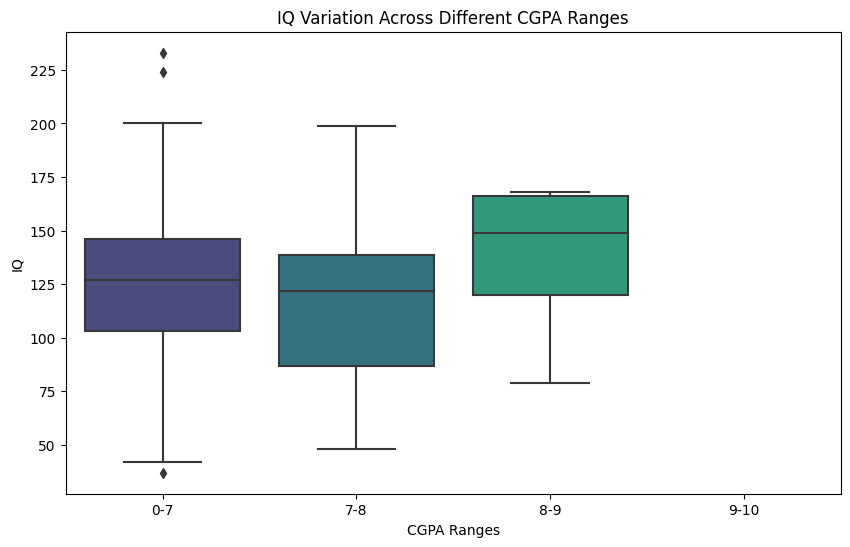

In [19]:
# Boxplot for IQ across different CGPA ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='cgpa_bins_analysis', y='iq', data=placement_data, palette='viridis')
plt.title('IQ Variation Across Different CGPA Ranges')
plt.xlabel('CGPA Ranges')
plt.ylabel('IQ')
plt.show()


**What is the Proportion of Students with Placement Based on Both CGPA and IQ?**

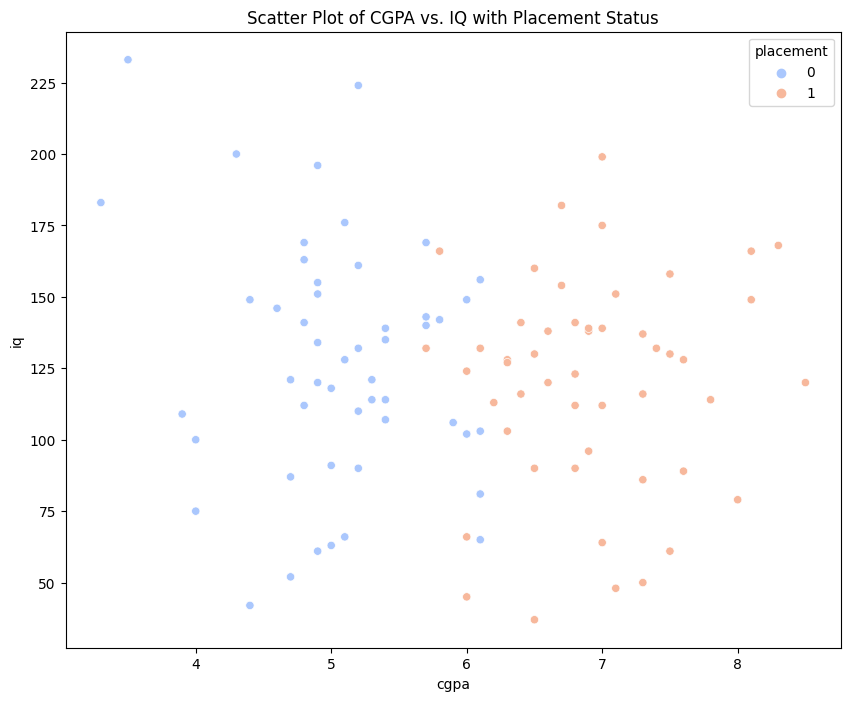

In [20]:
# Create a scatter plot with color indicating placement status
plt.figure(figsize=(10, 8))
sns.scatterplot(x='cgpa', y='iq', hue='placement', data=placement_data, palette='coolwarm')
plt.title('Scatter Plot of CGPA vs. IQ with Placement Status')
plt.show()


**What is the Proportion of Students with Placement Based on IQ Levels?**

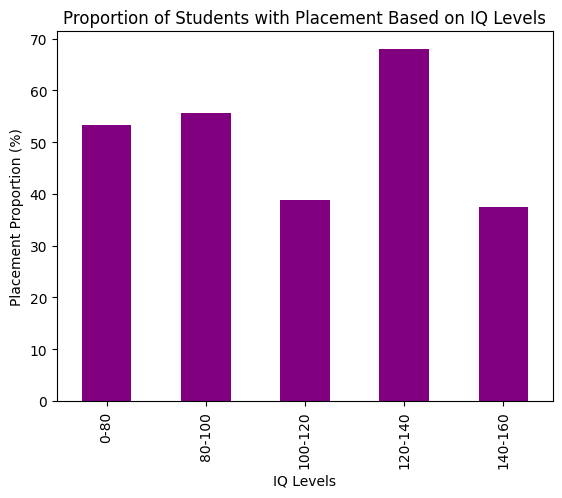

In [21]:
# Create IQ bins for analysis
iq_bins_analysis = [0, 80, 100, 120, 140, 160]
iq_labels_analysis = ['0-80', '80-100', '100-120', '120-140', '140-160']

# Create a new column for IQ bins for analysis
placement_data['iq_bins_analysis'] = pd.cut(placement_data['iq'], bins=iq_bins_analysis, labels=iq_labels_analysis, right=False)

# Calculate the proportion of students with placement for each IQ bin
placement_proportion_by_iq = placement_data.groupby('iq_bins_analysis')['placement'].mean() * 100

# Plot the bar chart
placement_proportion_by_iq.plot(kind='bar', color='purple')
plt.title('Proportion of Students with Placement Based on IQ Levels')
plt.xlabel('IQ Levels')
plt.ylabel('Placement Proportion (%)')
plt.show()


**How Does the CGPA Distribution Differ Between Different IQ Levels?**

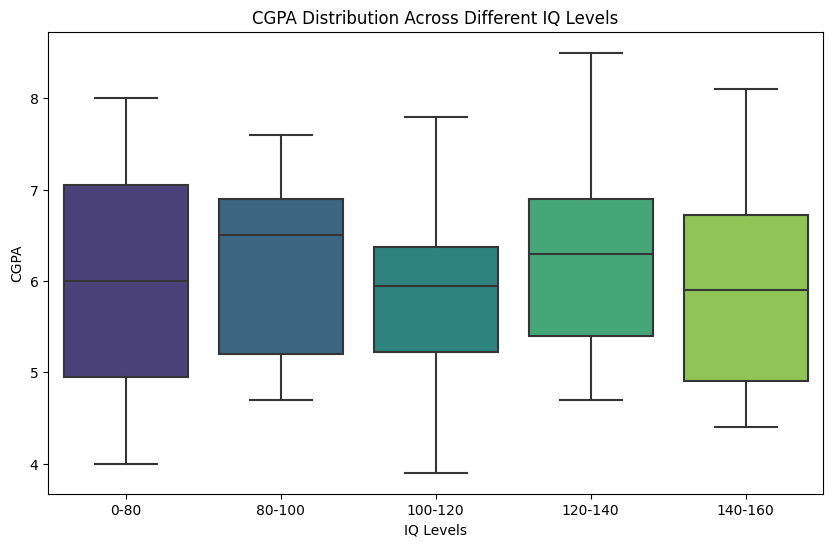

In [22]:
# Boxplot for CGPA across different IQ levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='iq_bins_analysis', y='cgpa', data=placement_data, palette='viridis')
plt.title('CGPA Distribution Across Different IQ Levels')
plt.xlabel('IQ Levels')
plt.ylabel('CGPA')
plt.show()
